<a href="https://colab.research.google.com/github/Madhuram2901/Machine_Learning_Projects/blob/main/WatchPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Model for Smartwatches Pricing**

# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Importing Dataset**

In [3]:
data_path = "/content/smartwatches.csv"
df = pd.read_csv(data_path)
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

# **Seperating Test and Train Data**

In [4]:
#train_df = df.sample(frac = 0.8 , random_state=42)
#test_df = df.drop(train_df.index)

In [5]:
#train_df = train_df.reset_index()
#test_df = test_df.reset_index()

In [6]:
train_df = df.copy()

In [7]:
df.shape, train_df.shape

((450, 16), (450, 16))

In [8]:
train_df.dtypes


Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [9]:
train_df.isna().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

# **Seperating the Data into Numerical(Not Object) and Continous(Object) Data**

In [11]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']

In [12]:
numerical_data

['Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [13]:
continuos_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [14]:
continuos_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

# **Correlltion(Training Data)**

In [15]:
train_df[numerical_data].corr()

Unnamed: 0  Current Price  Original Price  \
Unnamed: 0             1.000000      -0.082605       -0.079370   
Current Price         -0.082605       1.000000        0.970261   
Original Price        -0.079370       0.970261        1.000000   
Discount Percentage   -0.092257      -0.627595       -0.508600   
Rating                -0.263381       0.394447        0.332426   
Number OF Ratings     -0.130883      -0.142049       -0.136846   
Battery Life (Days)    0.353799       0.025192       -0.122888   

                     Discount Percentage    Rating  Number OF Ratings  \
Unnamed: 0                     -0.092257 -0.263381          -0.130883   
Current Price                  -0.627595  0.394447          -0.142049   
Original Price                 -0.508600  0.332426          -0.136846   
Discount Percentage             1.000000 -0.217765           0.204600   
Rating                         -0.217765  1.000000           0.054922   
Number OF Ratings               0.204600  0.054922           1.000000   
Battery Life (Days)            -0.008986 -0.090472           0.046864   

                     Battery Life (Days)  
Unnamed: 0                      0.353799  
Current Price                   0.025192  
Original Price                 -0.122888  
Discount Percentage            -0.008986  
Rating                         -0.090472  
Number OF Ratings               0.046864  
Battery Life (Days)             1.000000

# **Profiling**

In [16]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a23b65f0c002848ba8ede8f0a9d3e805ddc25ca3cc636cc9545ca43034107762
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [17]:
import ydata_profiling as pp

In [18]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Dropping unused properties**

In [19]:
train_df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [20]:
#train_df.drop(['df_index','Unnamed: 0'],axis=1,inplace=True)

In [21]:
train_df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [22]:
train_df['Display Size']

0             NaN
1      1.8 inches
2      1.7 inches
3      1.8 inches
4      1.7 inches
          ...    
445    1.3 inches
446    0.1 inches
447    1.3 inches
448    0.1 inches
449    0.1 inches
Name: Display Size, Length: 450, dtype: object

In [23]:
train_df['Display Size'].fillna('0.0 inches', inplace = True)

In [24]:
train_df['Display Size'].isna().sum()

0

In [25]:
float('0.0 inches'.split()[0])

0.0

In [26]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [27]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [28]:
train_df['Display Size'].replace(0.0, np.nan, inplace = True)

<ipython-input-28-7764b558c91e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0, np.nan, inplace = True)


In [29]:
train_df['Display Size'].isna().sum()

31

In [30]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [31]:
import re

In [32]:
re.findall('\d+', '20 - 35 g')

['20', '35']

In [33]:
cal = sum([int (x) for x in re.findall('\d+', '20 - 35 g')]) / 2
train_df['Weight'].replace('20 - 35 g', cal, inplace = True)

<ipython-input-33-e92b9ce56e32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g', cal, inplace = True)


In [34]:
train_df['Weight'].value_counts()

Weight
27.5         80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [35]:
cal = sum([int (x) for x in re.findall('\d+', '35 - 50 g')]) / 2
train_df['Weight'].replace('35 - 50 g', cal, inplace = True)

<ipython-input-35-fd4e50bfc7ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g', cal, inplace = True)


In [36]:
cal = sum([int (x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train_df['Weight'].replace('50 - 75 g', cal, inplace = True)

<ipython-input-36-496f5e55b44a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g', cal, inplace = True)


In [37]:
train_df['Weight'].replace('75g +', float(re.findall('\d+','75g +')[0]), inplace = True)

<ipython-input-37-199d4936173e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +', float(re.findall('\d+','75g +')[0]), inplace = True)


In [38]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+','<= 20 g')[0]), inplace = True)

<ipython-input-38-7f1ad5ef16cf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g', float(re.findall('\d+','<= 20 g')[0]), inplace = True)
<ipython-input-38-7f1ad5ef16cf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Weight'].replace('<= 20 g', float(r

In [39]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         419 non-null    float64
 15  Weight               264 non-null    flo

In [41]:
train_df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth  Display Size  Weight  
0       Yes           NaN    42.5  
1       Yes           1.8    62.5  
2       Yes           1.7    42.5  
3       Yes           1.8    75.0  
4       Yes           1.7    42.5

In [42]:
train_df['Discount Price'] = train_df['Original Price'] * (-train_df['Discount Percentage'])/100

In [43]:
train_df.drop('Discount Percentage', axis = 1, inplace = True)

**Numerical Column**

In [44]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [45]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [46]:
train_df[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
0        82990.0         89900.0     4.0               65.0   
1         3799.0         16999.0     4.3            20788.0   
2         1999.0          7990.0     3.8            21724.0   
3         1799.0         19999.0     4.3            13244.0   
4         1599.0          4999.0     4.1            13901.0   

   Battery Life (Days)  Display Size  Weight  Discount Price  
0                  8.0           NaN    42.5    -6910.000000  
1                  3.5           1.8    62.5   -13200.000001  
2                  8.0           1.7    42.5    -5991.000000  
3                  3.5           1.8    75.0   -18200.000000  
4                  8.0           1.7    42.5    -3400.000000

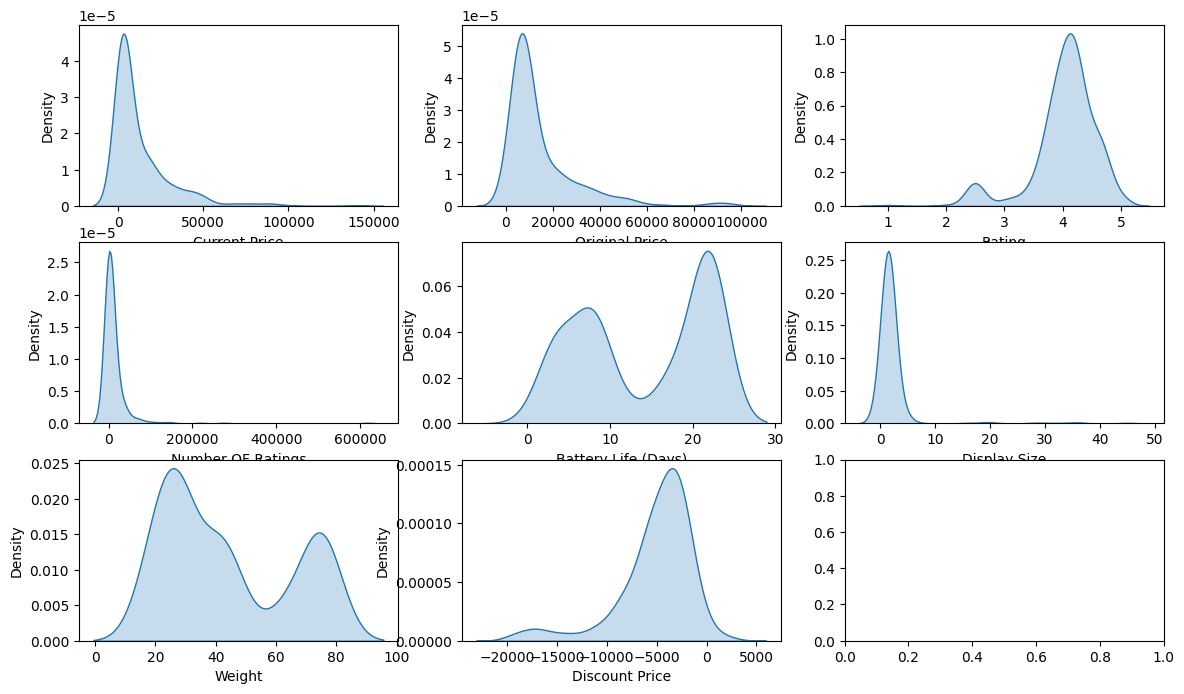

In [47]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14,8))

for i, column in enumerate(numerical_col):
  row = i // 3
  col = i % 3
  ax = axes[row, col]
  sns.kdeplot(data = train_df[column], ax = ax, fill = True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

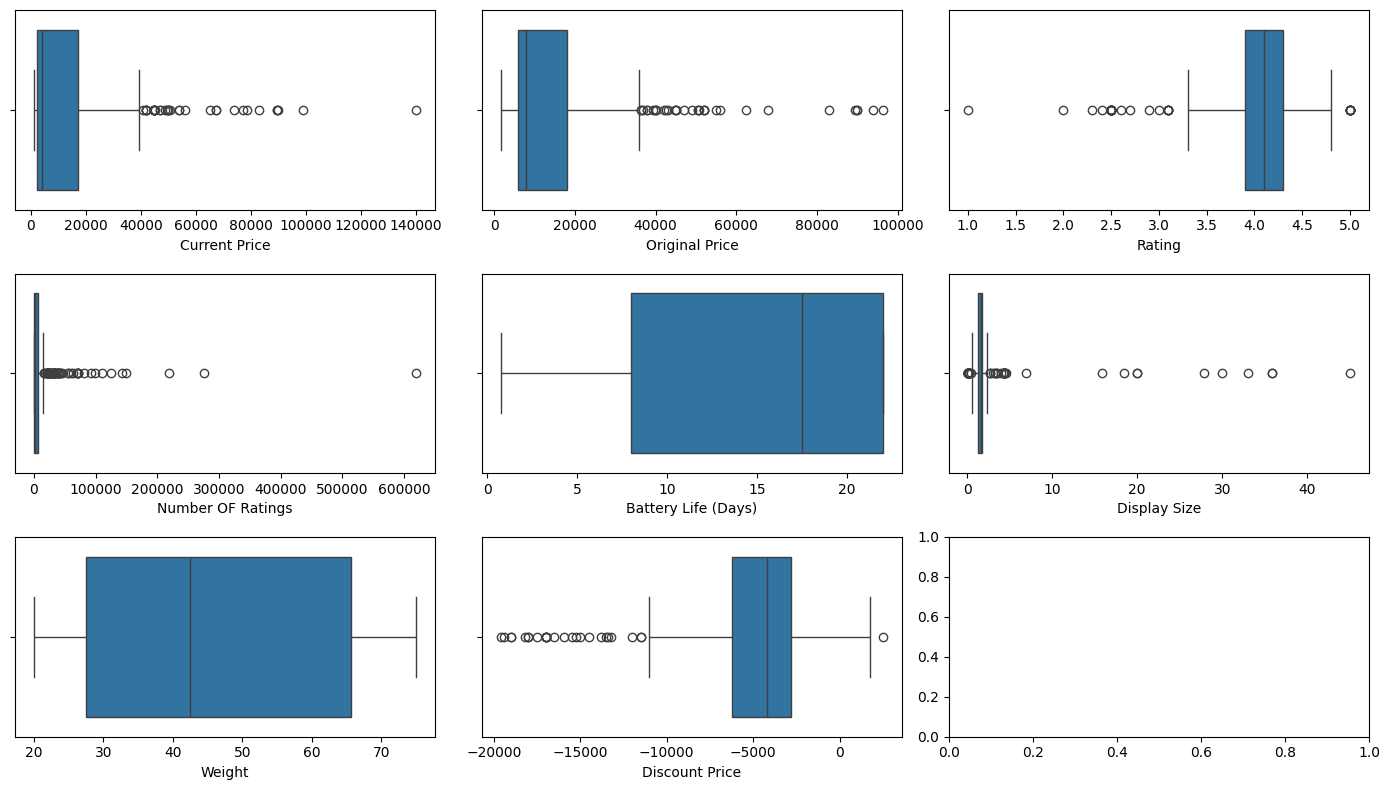

In [48]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14,8))

for i, column in enumerate(numerical_col):
  row = i // 3
  col = i % 3
  ax = axes[row, col]
  sns.boxplot(x= train_df[column], ax = ax)

fig.tight_layout()
plt.show()

In [49]:
def remove_outliers_IQR(df, column):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [50]:
train_df.columns

Index(['Unnamed: 0', 'Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [51]:
train_df.shape

(450, 16)

In [52]:
important_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']

In [53]:
for col in important_col:
  train_df = remove_outliers_IQR(train_df, col)

In [54]:
for col in numerical_col:
  print(col)
  train_df[col].fillna(train_df[col].median(), inplace = True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


<ipython-input-54-61c495820927>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace = True)


In [55]:
train_df.isna().sum()

Unnamed: 0              0
Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [56]:
train_df.isna().sum()

Unnamed: 0              0
Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [57]:
train_df.head()

Unnamed: 0       Brand  Current Price  Original Price  Rating  \
1           1  fire-boltt         3799.0         16999.0     4.3   
2           2        boat         1999.0          7990.0     3.8   
3           3  fire-boltt         1799.0         19999.0     4.3   
4           4       noise         1599.0          4999.0     4.1   
5           5       noise         1499.0          3999.0     4.0   

   Number OF Ratings                              Model Name Dial Shape  \
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
5            32704.0                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   
5         NaN          Other         Yes                  8.0       Yes   

   Display Size  Weight  Discount Price  
1           1.8    62.5   -13200.000001  
2           1.7    42.5    -5991.000000  
3           1.8    75.0   -18200.000000  
4           1.7    42.5    -3400.000000  
5           1.7    42.5    -2500.000000

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
Scaler = MinMaxScaler()

In [60]:
data = Scaler.fit_transform(train_df[numerical_col[:-1]])

In [61]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [62]:
data = pd.DataFrame(data, columns = numerical_col[:-1])

In [63]:
data.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.615385  0.772727  
1             0.341176      0.538462  0.409091  
2             0.129412      0.615385  1.000000  
3             0.341176      0.538462  0.409091  
4             0.341176      0.538462  0.409091

In [64]:
data.shape, train_df.shape

((181, 7), (181, 16))

In [65]:
pd.concat([train_df.reset_index(), data], axis=1).shape

(181, 24)

In [66]:
train_df = pd.concat([train_df.reset_index(), data], axis=1)

In [67]:
train_df.isna().sum()

index                   0
Unnamed: 0              0
Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [68]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [69]:
train_df.drop(numerical_col[:-1], axis = 1, inplace = True)

In [70]:
train_df.head()

index  Unnamed: 0       Brand                              Model Name  \
0      1           1  fire-boltt                                  BSW046   
1      2           2        boat                               Wave Call   
2      3           3  fire-boltt                                  BSW053   
3      4           4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   
4      5           5       noise                                  NSW-05   

  Dial Shape Strap Color Strap Material Touchscreen Bluetooth  Discount Price  
0        NaN         NaN        Silicon         Yes       Yes   -13200.000001  
1        NaN         NaN        Silicon         Yes       Yes    -5991.000000  
2        NaN         NaN        Silicon         Yes       Yes   -18200.000000  
3        NaN         NaN          Other         Yes       Yes    -3400.000000  
4        NaN         NaN          Other         Yes       Yes    -2500.000000

In [71]:
train_df = pd.concat([train_df, data], axis = 1)

In [72]:
train_df.head()

index  Unnamed: 0       Brand                              Model Name  \
0      1           1  fire-boltt                                  BSW046   
1      2           2        boat                               Wave Call   
2      3           3  fire-boltt                                  BSW053   
3      4           4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   
4      5           5       noise                                  NSW-05   

  Dial Shape Strap Color Strap Material Touchscreen Bluetooth  Discount Price  \
0        NaN         NaN        Silicon         Yes       Yes   -13200.000001   
1        NaN         NaN        Silicon         Yes       Yes    -5991.000000   
2        NaN         NaN        Silicon         Yes       Yes   -18200.000000   
3        NaN         NaN          Other         Yes       Yes    -3400.000000   
4        NaN         NaN          Other         Yes       Yes    -2500.000000   

   Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.615385  0.772727  
1             0.341176      0.538462  0.409091  
2             0.129412      0.615385  1.000000  
3             0.341176      0.538462  0.409091  
4             0.341176      0.538462  0.409091

In [73]:
train_df[numerical_col]

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.111631        0.568365  0.833333           0.622082   
1         0.034348        0.229960  0.416667           0.650096   
2         0.025761        0.681053  0.833333           0.396295   
3         0.017174        0.117609  0.666667           0.415958   
4         0.012881        0.080047  0.583333           0.978720   
..             ...             ...       ...                ...   
176       0.184621        0.211517  0.500000           0.000569   
177       0.068696        0.136391  0.500000           0.000569   
178       0.029969        0.001164  0.000000           0.000030   
179       0.120218        0.305424  0.333333           0.000000   
180       0.120218        0.305424  0.333333           0.000090   

     Battery Life (Days)  Display Size    Weight  Discount Price  
0               0.129412      0.615385  0.772727   -13200.000001  
1               0.341176      0.538462  0.409091    -5991.000000  
2               0.129412      0.615385  1.000000   -18200.000000  
3               0.341176      0.538462  0.409091    -3400.000000  
4               0.341176      0.538462  0.409091    -2500.000000  
..                   ...           ...       ...             ...  
176             1.000000      0.615385  0.409091    -2000.000000  
177             1.000000      0.538462  0.409091    -2700.000000  
178             1.000000      1.000000  0.409091       -2.000000  
179             1.000000      0.538462  0.409091    -6000.000000  
180             1.000000      0.538462  0.409091    -6000.000000  

[181 rows x 8 columns]

# **Categorical** **Columns**

In [74]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [75]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [76]:
train_df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
0  fire-boltt                                  BSW046        NaN         NaN   
1        boat                               Wave Call        NaN         NaN   
2  fire-boltt                                  BSW053        NaN         NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
4       noise                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen Bluetooth  
0        Silicon         Yes       Yes  
1        Silicon         Yes       Yes  
2        Silicon         Yes       Yes  
3          Other         Yes       Yes  
4          Other         Yes       Yes

In [77]:
train_df.drop('Bluetooth', axis = 1, inplace = True)

In [78]:
categorical_col.remove('Bluetooth')

In [79]:
train_df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
0  fire-boltt                                  BSW046        NaN         NaN   
1        boat                               Wave Call        NaN         NaN   
2  fire-boltt                                  BSW053        NaN         NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
4       noise                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen  
0        Silicon         Yes  
1        Silicon         Yes  
2        Silicon         Yes  
3          Other         Yes  
4          Other         Yes

In [80]:
from scipy.stats import f_oneway

In [81]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnnovaRes = f_oneway(*CategoryGroupLists)
    print(col, ': ', 'P-value for Annova is: ', AnnovaRes[1])

Brand :  P-value for Annova is:  8.421850586222326e-14
Model Name :  P-value for Annova is:  4.263744302000662e-05
Dial Shape :  P-value for Annova is:  0.0001236872758889996
Strap Color :  P-value for Annova is:  0.06574836943894026
Strap Material :  P-value for Annova is:  0.00039800860157354883
Touchscreen :  P-value for Annova is:  0.9803878528536762


**Check for cols having Annova Result less than 0.05 to use further**

In [82]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']

In [83]:
train_df[imp_col].head()

Brand                              Model Name Dial Shape  \
0  fire-boltt                                  BSW046        NaN   
1        boat                               Wave Call        NaN   
2  fire-boltt                                  BSW053        NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4       noise                                  NSW-05        NaN   

  Strap Material  
0        Silicon  
1        Silicon  
2        Silicon  
3          Other  
4          Other

In [84]:
for col in imp_col:
    train_df[col].fillna('other', inplace = True)

<ipython-input-84-9bdc8bcc7635>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('other', inplace = True)


In [85]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [86]:
brand = pd.get_dummies(train_df['Brand'], drop_first = True)

In [87]:
model_name = pd.get_dummies(train_df['Model Name']).drop('other', axis = 1)

In [88]:
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop('other', axis = 1)

In [89]:
strap_material = pd.get_dummies(train_df['Strap Material']).drop('other', axis = 1)

In [90]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis = 1)

In [91]:
imp_df.head()

ambrane   boat  crossbeats   dizo  fire-boltt  fitbit  fossil  garmin  \
0    False  False       False  False        True   False   False   False   
1    False   True       False  False       False   False   False   False   
2    False  False       False  False        True   False   False   False   
3    False  False       False  False       False   False   False   False   
4    False  False       False  False       False   False   False   False   

   gizmore  hammer  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
0    False   False  ...    False  False  False  False    False   False   
1    False   False  ...    False  False  False  False    False   False   
2    False   False  ...    False  False  False  False    False   False   
3    False   False  ...    False  False  False   True    False   False   
4    False   False  ...    False  False  False   True    False   False   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0     True            False      False                        False  
1     True            False      False                        False  
2     True            False      False                        False  
3    False            False      False                        False  
4    False            False      False                        False  

[5 rows x 193 columns]

In [92]:
imp_df = imp_df.applymap(lambda x: 1 if x == True else 0)

<ipython-input-92-ee4c85ddfd0b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  imp_df = imp_df.applymap(lambda x: 1 if x == True else 0)


In [93]:
imp_df.head()

ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  garmin  \
0        0     0           0     0           1       0       0       0   
1        0     1           0     0           0       0       0       0   
2        0     0           0     0           1       0       0       0   
3        0     0           0     0           0       0       0       0   
4        0     0           0     0           0       0       0       0   

   gizmore  hammer  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
0        0       0  ...        0      0      0      0        0       0   
1        0       0  ...        0      0      0      0        0       0   
2        0       0  ...        0      0      0      0        0       0   
3        0       0  ...        0      0      0      1        0       0   
4        0       0  ...        0      0      0      1        0       0   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0        1                0          0                            0  
1        1                0          0                            0  
2        1                0          0                            0  
3        0                0          0                            0  
4        0                0          0                            0  

[5 rows x 193 columns]

In [94]:
new_df = pd.concat([train_df[numerical_col],imp_df], axis = 1)

In [95]:
new_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  boat  \
0             0.129412      0.615385  0.772727   -13200.000001        0     0   
1             0.341176      0.538462  0.409091    -5991.000000        0     1   
2             0.129412      0.615385  1.000000   -18200.000000        0     0   
3             0.341176      0.538462  0.409091    -3400.000000        0     0   
4             0.341176      0.538462  0.409091    -2500.000000        0     0   

   ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0  ...        0      0      0      0        0       0        1   
1  ...        0      0      0      0        0       0        1   
2  ...        0      0      0      0        0       0        1   
3  ...        0      0      0      1        0       0        0   
4  ...        0      0      0      1        0       0        0   

   Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                0          0                            0  
1                0          0                            0  
2                0          0                            0  
3                0          0                            0  
4                0          0                            0  

[5 rows x 201 columns]

In [96]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 201, dtype: int64

# **Model Building**

## **Linear Regression**

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
new_df['Discount Price'].head()

0   -13200.000001
1    -5991.000000
2   -18200.000000
3    -3400.000000
4    -2500.000000
Name: Discount Price, dtype: float64

In [100]:
X = new_df.drop('Discount Price', axis = 1)
y = new_df['Discount Price']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [102]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = ln_model.predict(X_test)

In [104]:
R2_Score = r2_score(y_test, y_pred)

In [105]:
R2_Score

-487.0172025579591

## **Decison Tree**

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score

0.7286956143895418

## **Random Forest**

In [111]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score

0.5591028445700782

## **XGBoost**

In [112]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score

0.6958960389142593

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score



0.817461682028274

In [115]:
score = cross_val_score(dt_model, X, y, cv = 5, scoring = 'r2')
score, score.mean(), score.std()

(array([ 0.24225291,  0.43334974,  0.02335273, -0.06390299, -0.46703927]),
 0.033602626119922374,
 0.30449545446607623)

In [116]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score

0.5805012757899242

In [117]:
score = cross_val_score(dt_model, X, y, cv = 5, scoring = 'r2')
score, score.mean(), score.std()

(array([ 0.313623  ,  0.57786031, -0.06076686, -0.14095129, -0.19651873]),
 0.09864928386775958,
 0.29859772262551504)

In [118]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score

0.6958960389142593

In [119]:
score = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
score, score.mean(), score.std()

(array([0.71687457, 0.85160856, 0.65360352, 0.52677189, 0.59881393]),
 0.6695344907745989,
 0.11047932405115413)

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
from xgboost import XGBRegressor

In [123]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,4,5],
    'learning_rate': [0.01,0.1,0.2]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

R2_Score = r2_score(y_test, y_pred)
R2_Score

0.7460260949741991